# Radon-Transform (CUDA)

## Setup

In [1]:
from math import sin, cos, ceil, sqrt
import typing
import torch
import torchvision
import matplotlib.pyplot as plt
import radon
import torch_radon

In [2]:
positions = torch.arange(-ceil(32*1.41421356237/2.0), ceil(32*1.41421356237/2.0)+1, dtype=torch.float32, device="cuda")
angles = torch.linspace(0.0, torch.pi, 33, device="cuda")[:-1]
a = torch.randn((1,1,32,32), device="cuda")
b = torch.randn((1,1,angles.shape[0],positions.shape[0]), device="cuda")
Aa = radon.radon_forward(a, angles, positions)
Atb = radon.radon_backward(b, 32, angles, positions)
print(torch.sum(Aa*b))
print(torch.sum(a*Atb))

tensor(-9.0569, device='cuda:0')
tensor(-130.1112, device='cuda:0')


In [3]:
positions = torch.arange(-ceil(32*1.41421356237/2.0), ceil(32*1.41421356237/2.0)+1, dtype=torch.float32)
angles = torch.linspace(0.0, torch.pi, 33)[:-1]
torchradon = torch_radon.Radon(32, angles, positions.shape[0], 1)
a = torch.randn((1,1,32,32), device="cuda")
b = torch.randn((1,1,angles.shape[0],positions.shape[0]), device="cuda")
Aa = torchradon.forward(a)
Atb = torchradon.backprojection(b)
print(torch.sum(Aa*b))
print(torch.sum(a*Atb))

tensor(-90.7874, device='cuda:0')
tensor(-93.3027, device='cuda:0')


Files already downloaded and verified


/home/alexander/anaconda3/envs/FSDLIP/lib/python3.10/site-packages/torch_radon-1.0.0-py3.10-linux-x86_64.egg/torch_radon/__init__.py:108: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484803030/work/aten/src/ATen/native/Copy.cpp:250.)
  return filtered_sinogram.to(dtype=sinogram.dtype)


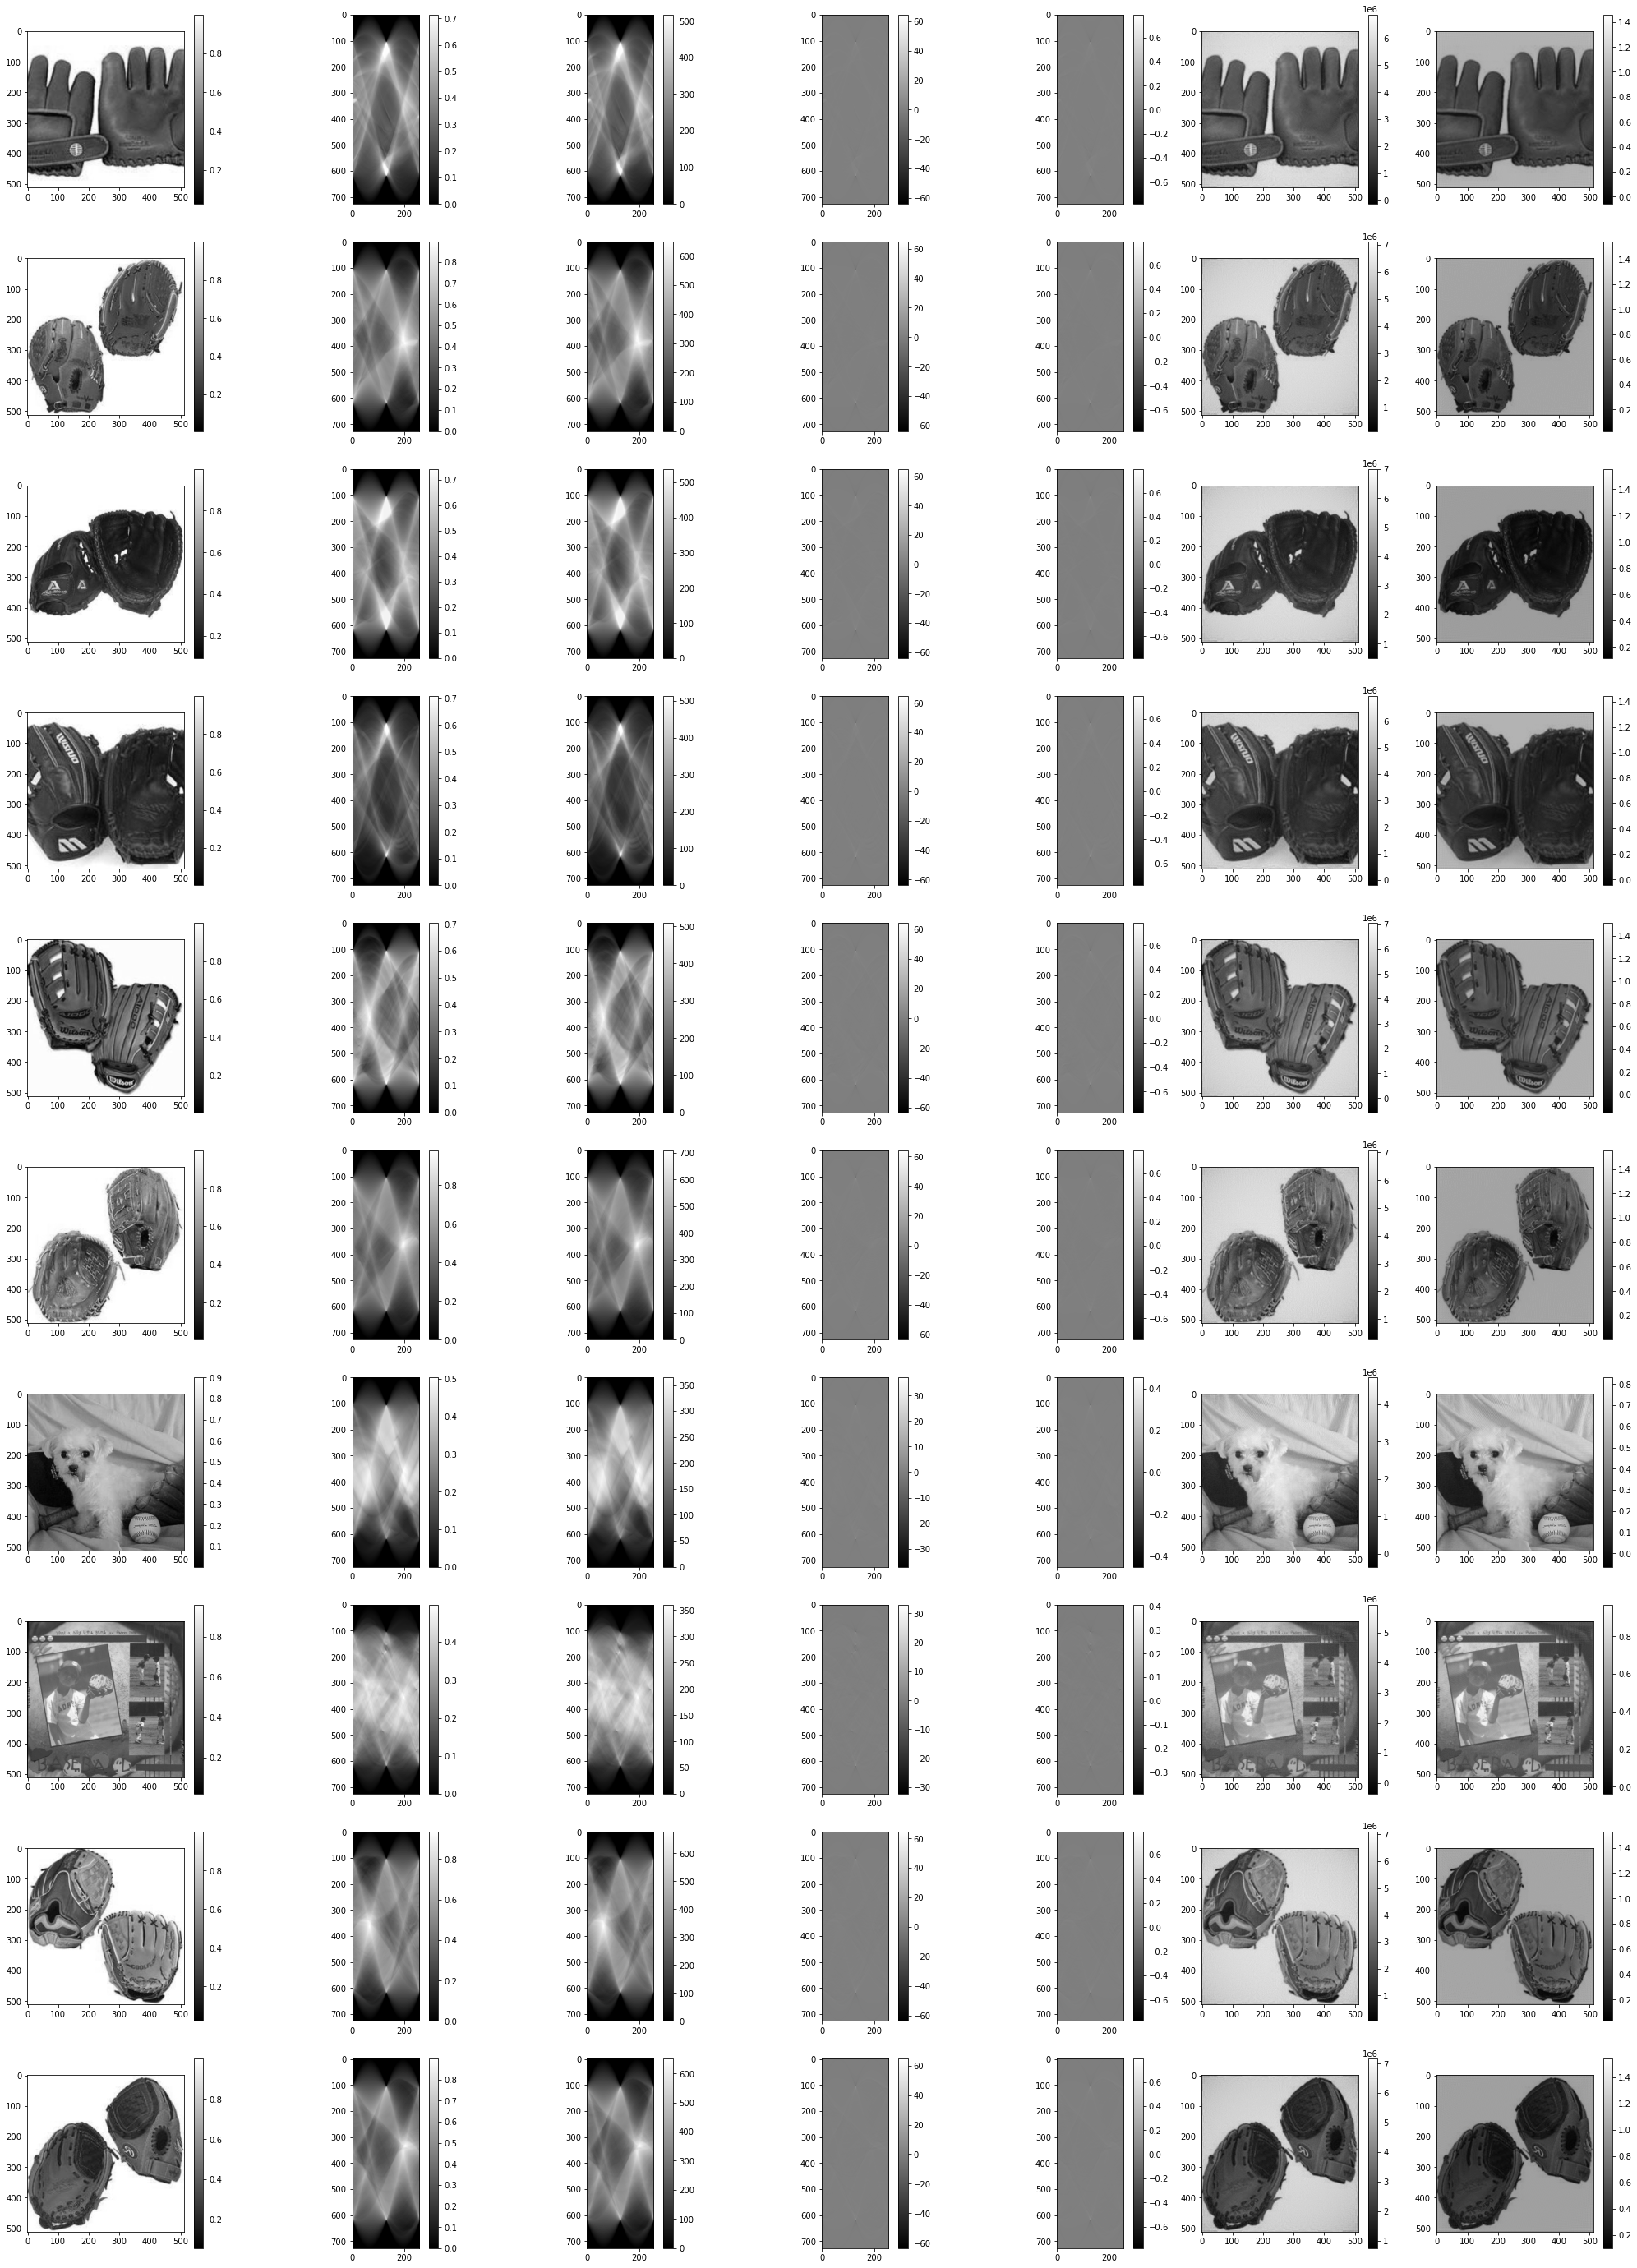

In [4]:
dataset = torchvision.datasets.Caltech256("/data/datasets/", download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Grayscale(), torchvision.transforms.Resize(512, antialias=True), torchvision.transforms.CenterCrop(512)]))
rows, cols = 10, 7
plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
for i in range(10):
    img = dataset[555+i][0].unsqueeze(0).contiguous().to("cuda")
    sino = radon.radon_forward(img)
    fsino = radon.radon_filter(sino, radon.ram_lak_filter)
    recon = radon.radon_backward(fsino, img.shape[-1])
    recon *= 1e5/sqrt(2.0)
    torchradon = torch_radon.Radon(512, torch.linspace(0.0, 3.14159265359, 257)[:-1], 2*ceil(512*2.0**0.5/2.0)+1, 1)
    sino2 = torchradon.forward(img)
    fsino2 = torchradon.filter_sinogram(sino2)
    recon2 = torchradon.backprojection(fsino2)
    plt.subplot(rows, cols, i*cols+1)
    plt.imshow(img[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+2)
    plt.imshow(sino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+3)
    plt.imshow(sino2[0,0].to("cpu").flip(0,1).mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+4)
    plt.imshow(fsino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+5)
    plt.imshow(fsino2[0,0].to("cpu").flip(0,1).mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+6)
    plt.imshow(recon[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+7)
    plt.imshow(recon2[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
plt.show()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


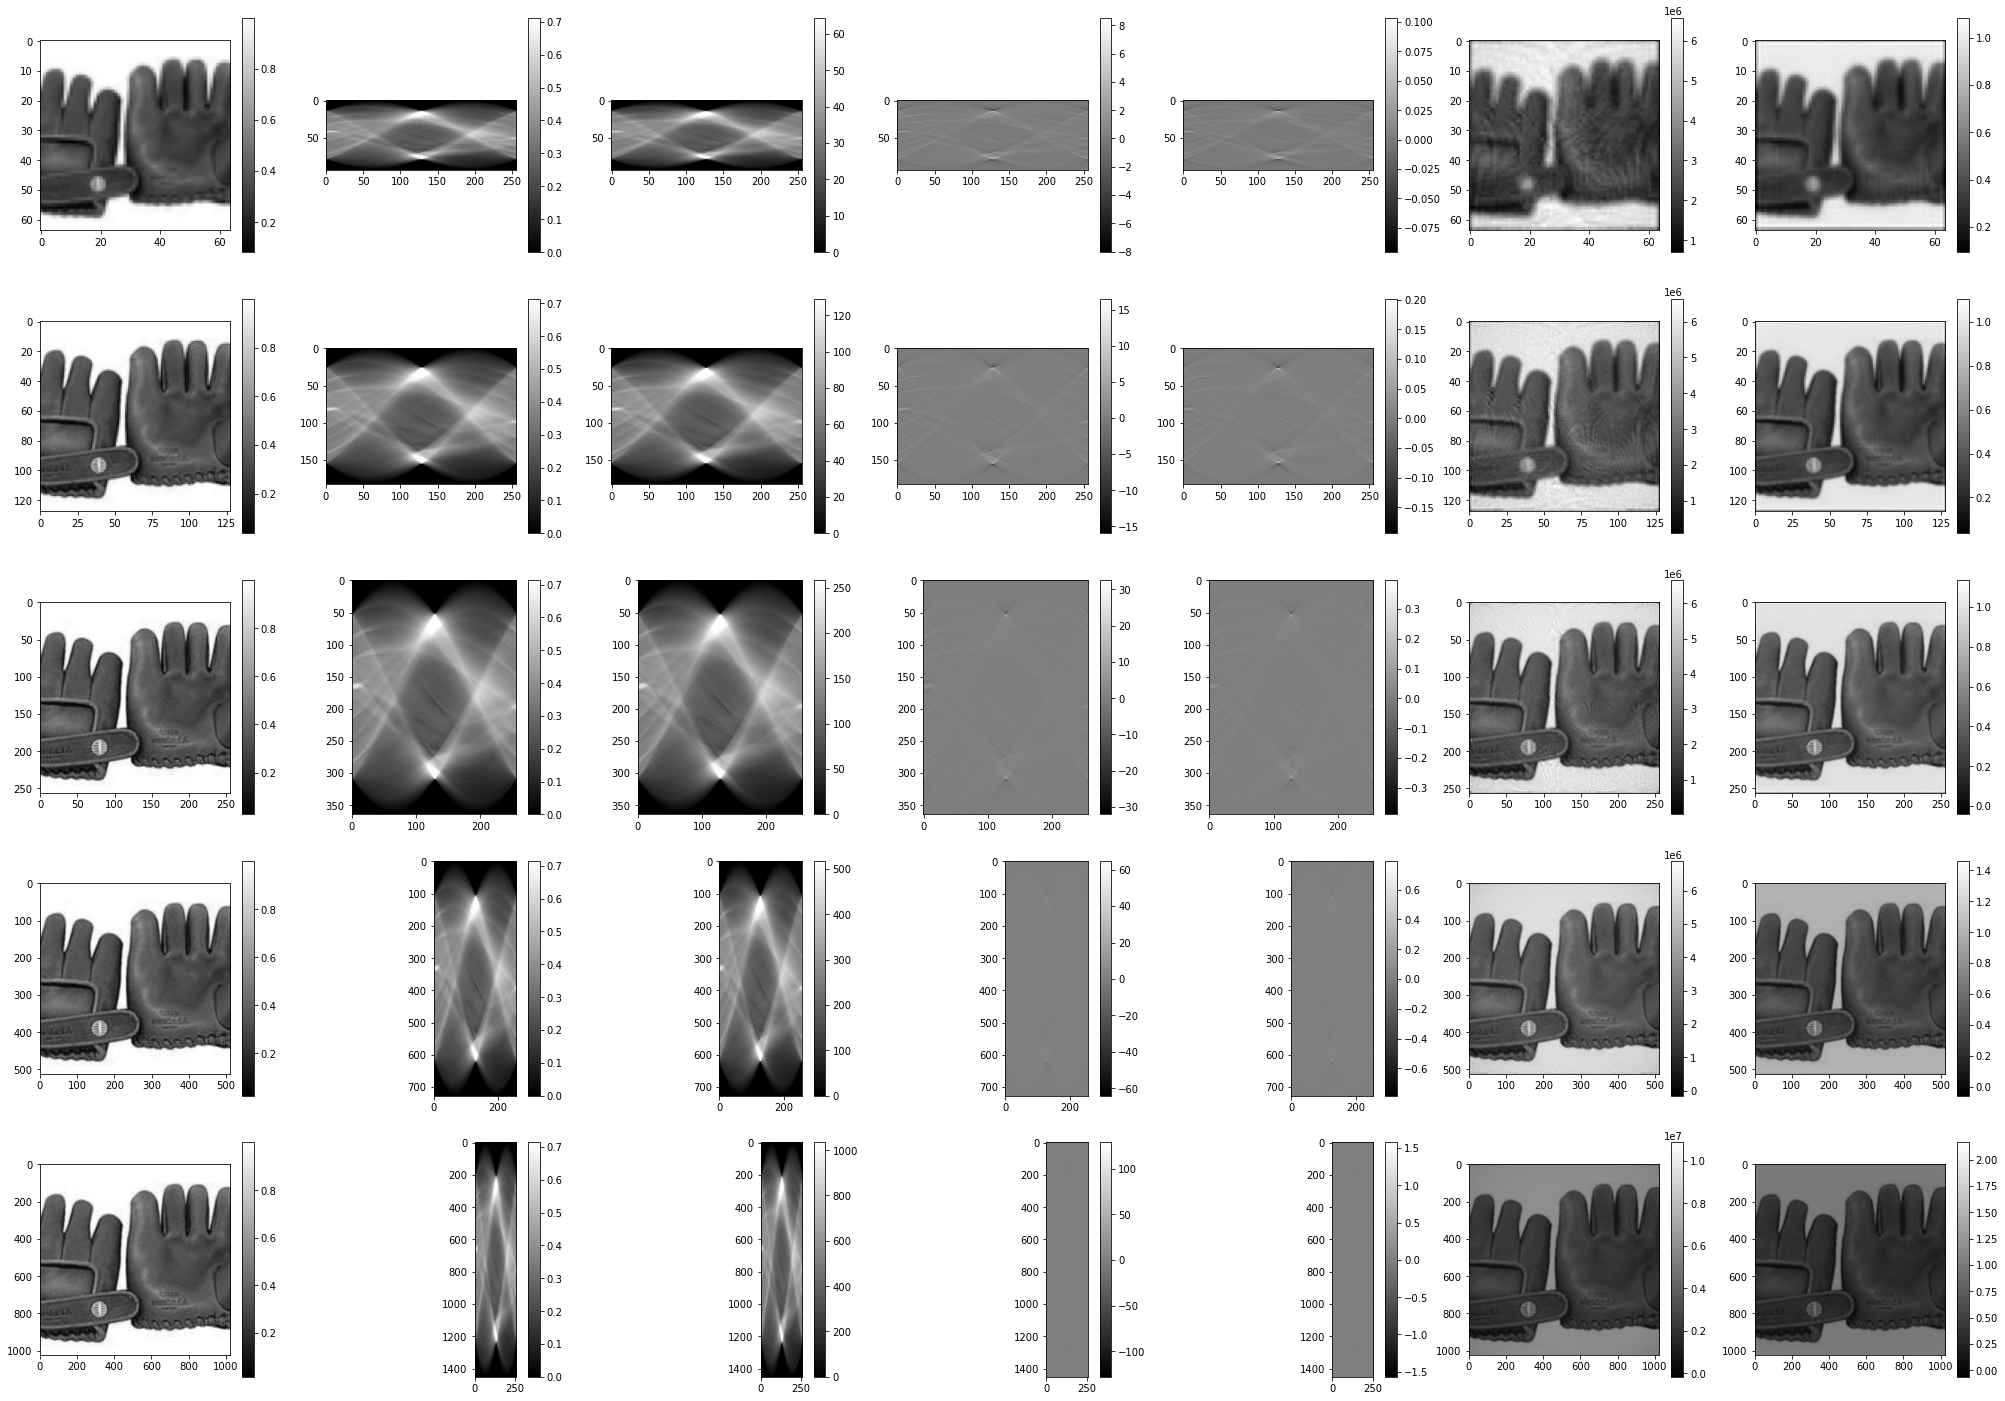

In [5]:
rows, cols = 5, 7
plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
for i in range(5):
    size = [64,128,256,512,1024][i]
    img = torchvision.datasets.Caltech256("/data/datasets/", download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Grayscale(), torchvision.transforms.Resize(size, antialias=True), torchvision.transforms.CenterCrop(size)]))[555][0].unsqueeze(0).contiguous().to("cuda")
    sino = radon.radon_forward(img)
    fsino = radon.radon_filter(sino, radon.ram_lak_filter)
    recon = radon.radon_backward(fsino, img.shape[-1])
    recon *= 1e5/sqrt(2.0)
    torchradon = torch_radon.Radon(size, torch.linspace(0.0, 3.14159265359, 257)[:-1], 2*ceil(size*2.0**0.5/2.0)+1, 1)
    sino2 = torchradon.forward(img)
    fsino2 = torchradon.filter_sinogram(sino2)
    recon2 = torchradon.backprojection(fsino2)
    plt.subplot(rows, cols, i*cols+1)
    plt.imshow(img[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+2)
    plt.imshow(sino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+3)
    plt.imshow(sino2[0,0].to("cpu").flip(0,1).mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+4)
    plt.imshow(fsino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+5)
    plt.imshow(fsino2[0,0].to("cpu").flip(0,1).mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+6)
    plt.imshow(recon[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+7)
    plt.imshow(recon2[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
plt.show()

Files already downloaded and verified


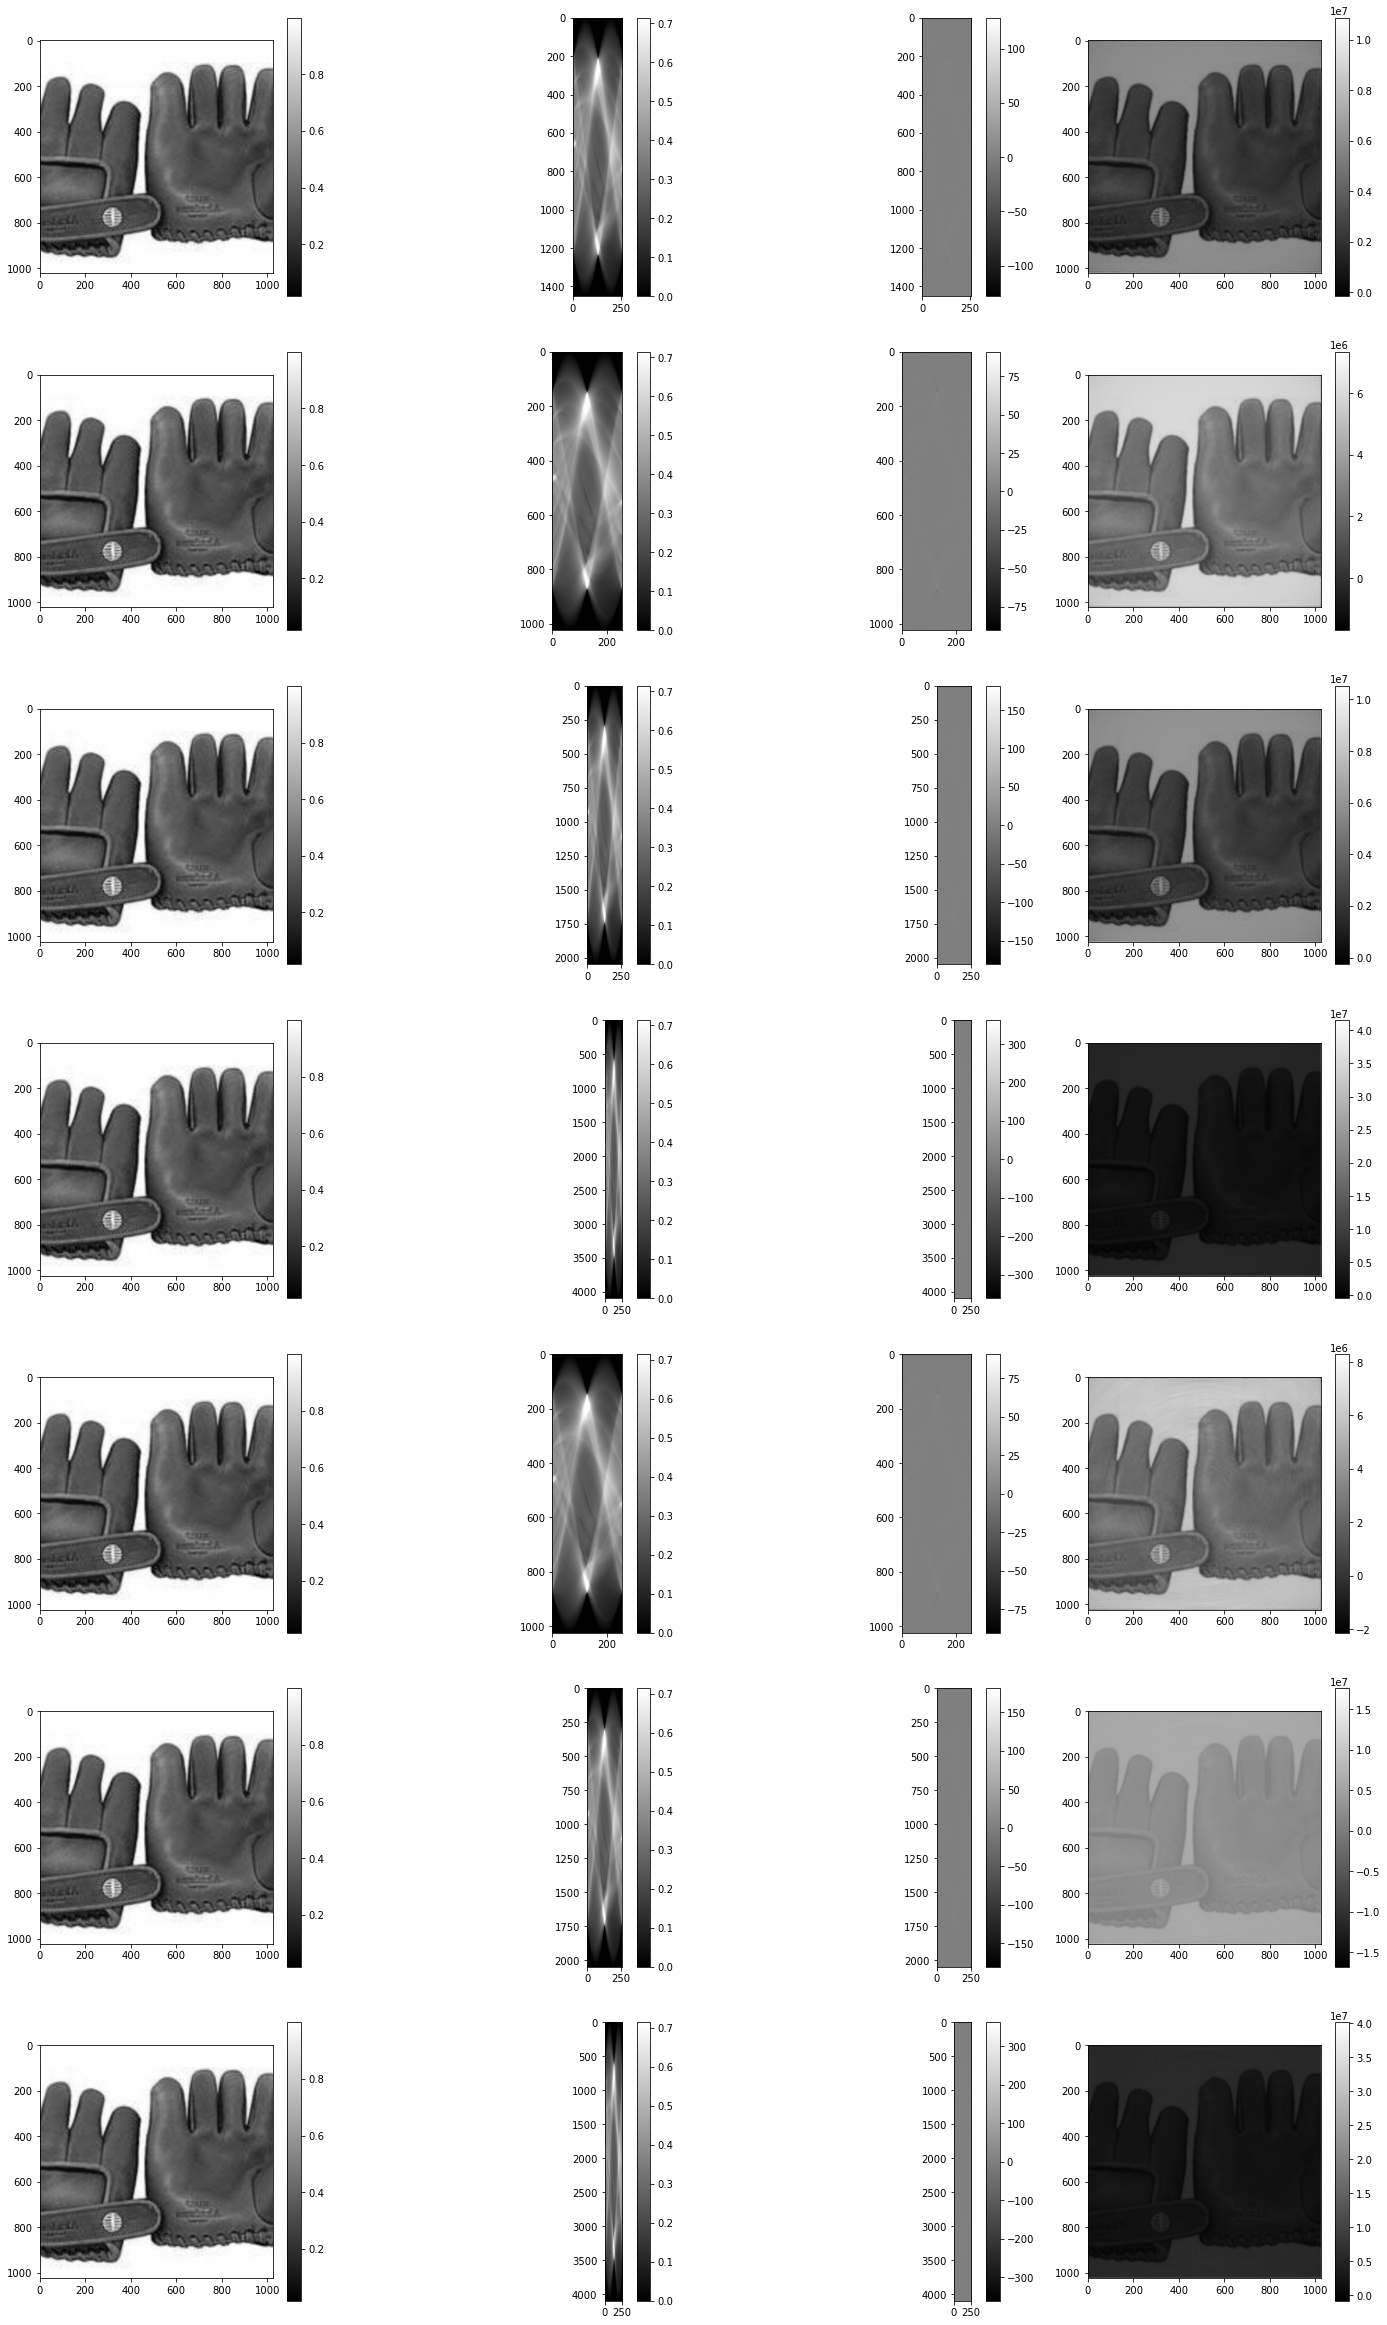

In [6]:
img = torchvision.datasets.Caltech256("/data/datasets/", download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Grayscale(), torchvision.transforms.Resize(size, antialias=True), torchvision.transforms.CenterCrop(size)]))[555][0].unsqueeze(0).contiguous().to("cuda")
rows, cols = 7, 4
plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
for i in range(7):
    positions = [
        torch.arange(-ceil(img.shape[2]*1.41421356237/2.0), ceil(img.shape[2]*1.41421356237/2.0)+1, device="cuda", dtype=torch.float32), 
        torch.linspace(-ceil(img.shape[2]*1.41421356237/2.0), ceil(img.shape[2]*1.41421356237/2.0), 1024, device="cuda"), 
        torch.linspace(-ceil(img.shape[2]*1.41421356237/2.0), ceil(img.shape[2]*1.41421356237/2.0), 2048, device="cuda"), 
        torch.linspace(-ceil(img.shape[2]*1.41421356237/2.0), ceil(img.shape[2]*1.41421356237/2.0), 4096, device="cuda"),
        torch.cumsum(torch.softmax(torch.rand((1024,), device="cuda"), 0), 0)*(2*ceil(img.shape[2]*1.41421356237/2.0)+1)-ceil(img.shape[2]*1.41421356237/2.0),
        torch.cumsum(torch.softmax(torch.rand((2048,), device="cuda"), 0), 0)*(2*ceil(img.shape[2]*1.41421356237/2.0)+1)-ceil(img.shape[2]*1.41421356237/2.0),
        torch.cumsum(torch.softmax(torch.rand((4096,), device="cuda"), 0), 0)*(2*ceil(img.shape[2]*1.41421356237/2.0)+1)-ceil(img.shape[2]*1.41421356237/2.0)
    ][i]
    sino = radon.radon_forward(img, positions=positions)
    fsino = radon.radon_filter(sino, radon.ram_lak_filter)
    recon = radon.radon_backward(fsino, img.shape[-1], positions=positions)
    recon *= 1e5/sqrt(2.0)
    plt.subplot(rows, cols, i*cols+1)
    plt.imshow(img[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+2)
    plt.imshow(sino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+3)
    plt.imshow(fsino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+4)
    plt.imshow(recon[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
plt.show()

Files already downloaded and verified


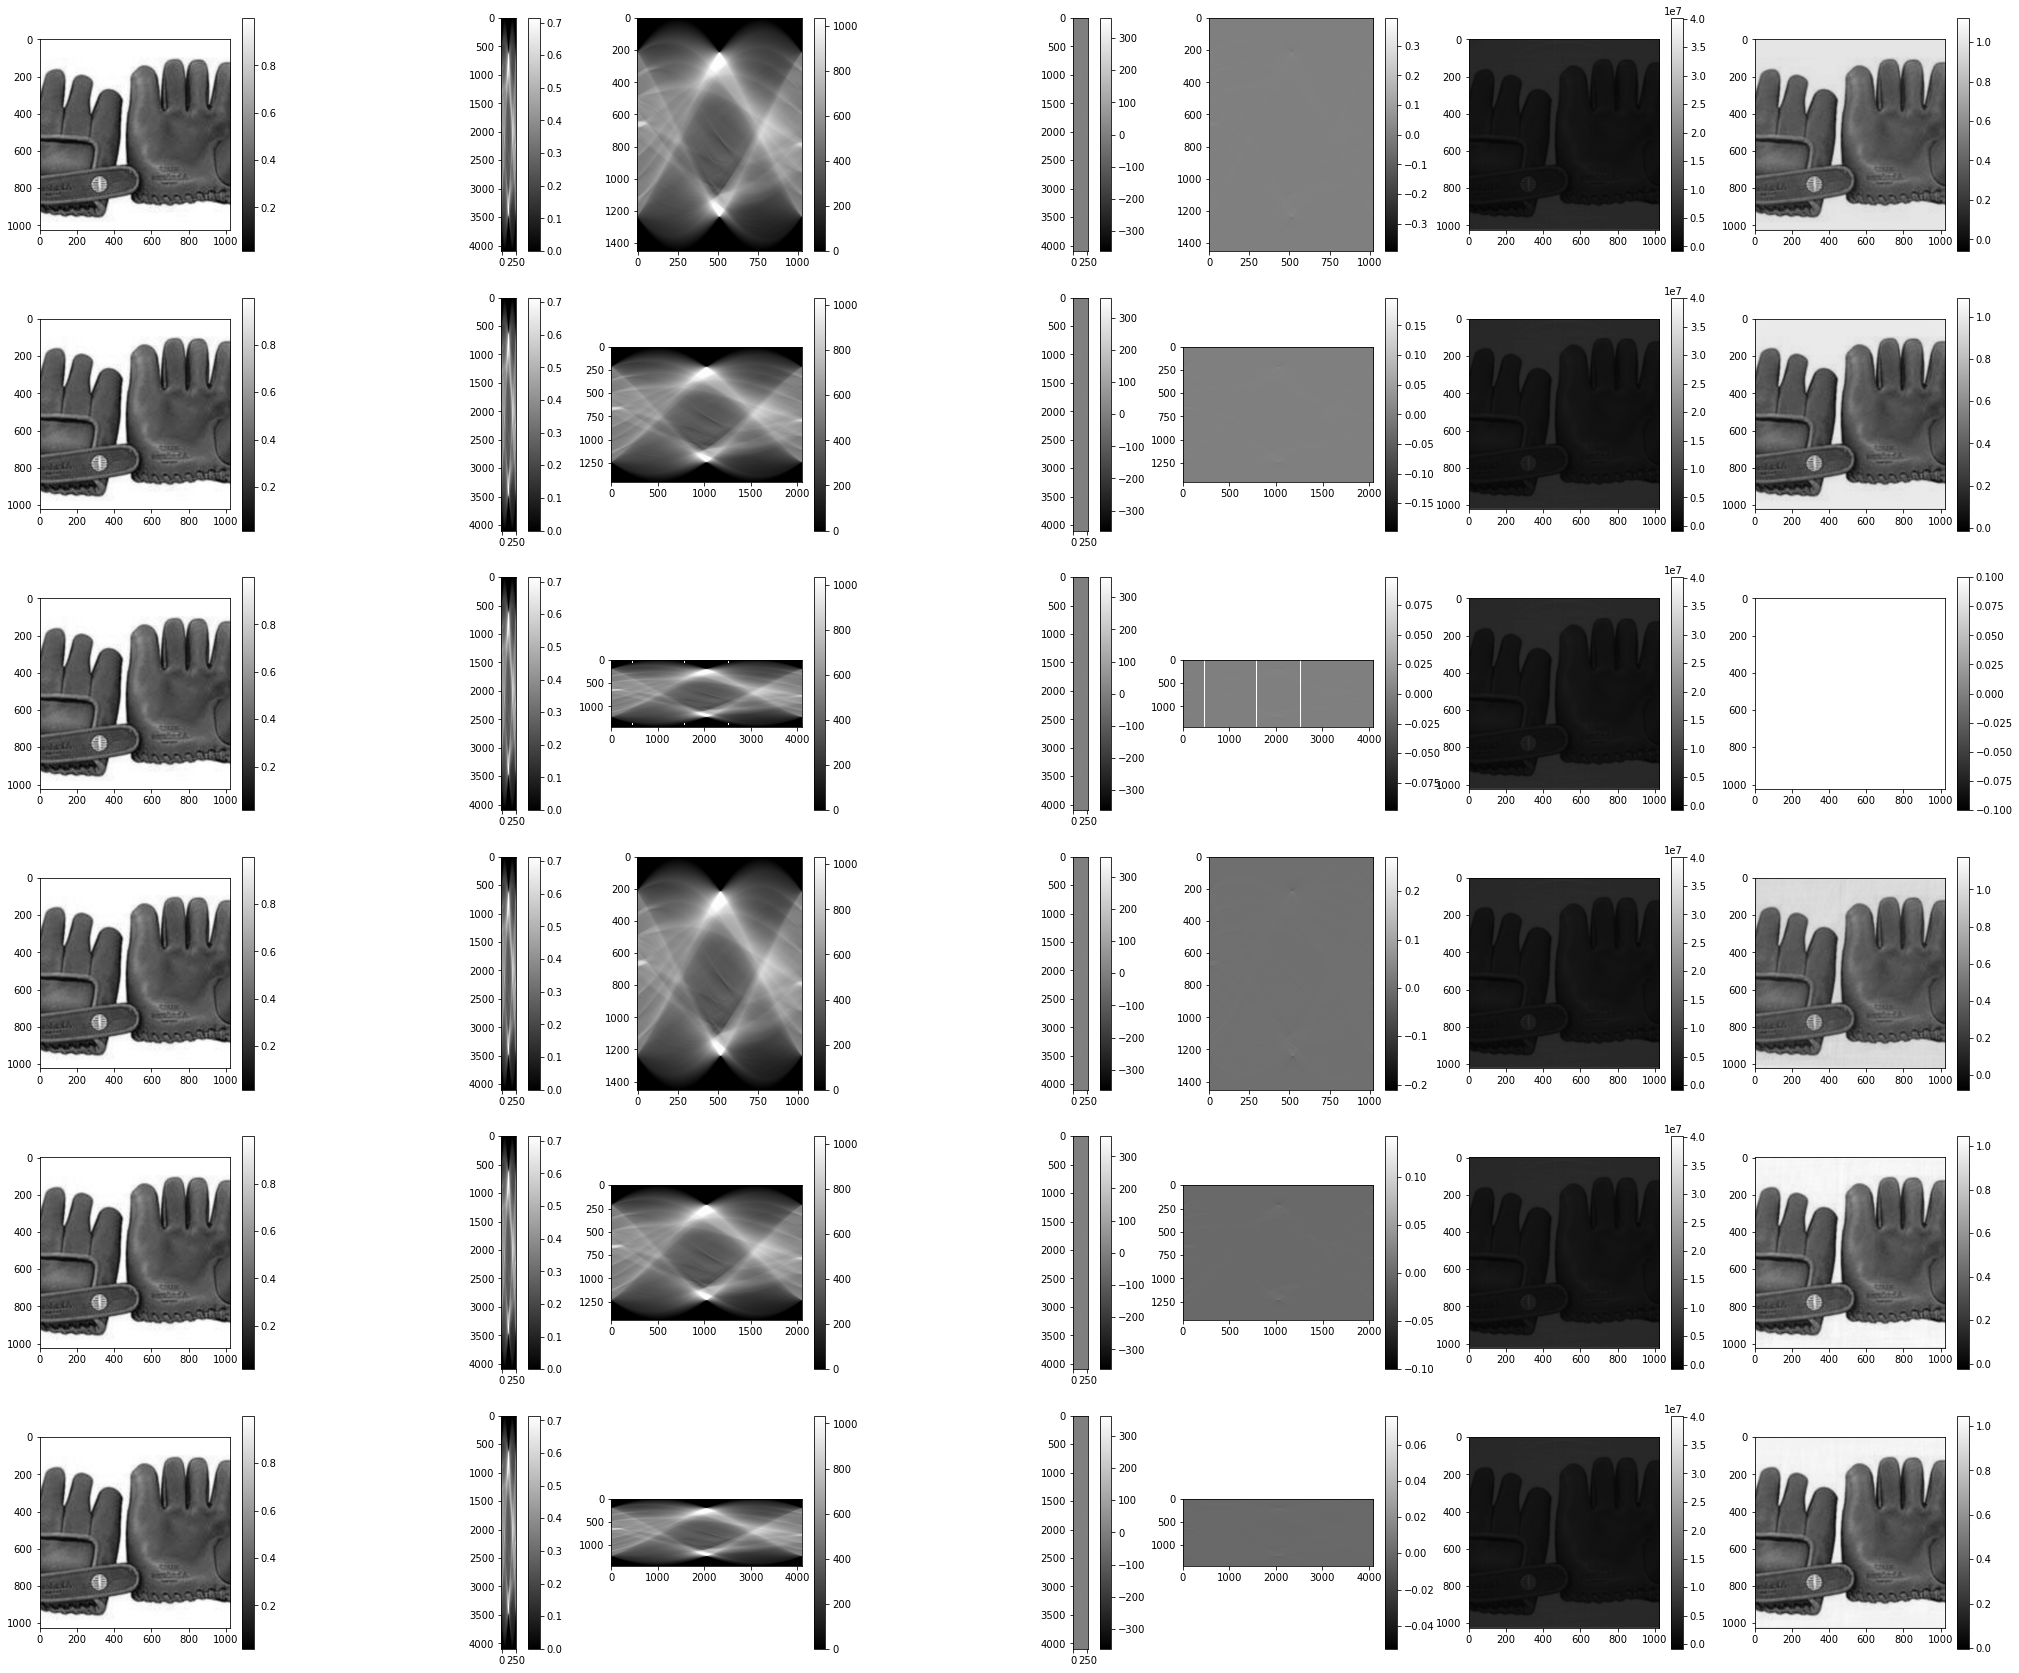

In [7]:
img = torchvision.datasets.Caltech256("/data/datasets/", download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Grayscale(), torchvision.transforms.Resize(size, antialias=True), torchvision.transforms.CenterCrop(size)]))[555][0].unsqueeze(0).contiguous().to("cuda")
rows, cols = 6, 7
plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
for i in range(6):
    angles = [
        torch.linspace(0.0, torch.pi, 1024+1, device="cuda")[:-1], 
        torch.linspace(0.0, torch.pi, 2048+1, device="cuda")[:-1], 
        torch.linspace(0.0, torch.pi, 4096+1, device="cuda")[:-1],
        (torch.cumsum(torch.softmax(torch.rand((1024+1,), device="cuda"), 0), 0)*torch.pi)[:-1],
        (torch.cumsum(torch.softmax(torch.rand((2048+1,), device="cuda"), 0), 0)*torch.pi)[:-1],
        (torch.cumsum(torch.softmax(torch.rand((4096+1,), device="cuda"), 0), 0)*torch.pi)[:-1]
    ][i]
    sino = radon.radon_forward(img, thetas=angles)
    fsino = radon.radon_filter(sino, radon.ram_lak_filter)
    recon = radon.radon_backward(fsino, img.shape[-1], thetas=angles)
    recon *= 1e5/sqrt(2.0)
    torchradon = torch_radon.Radon(size, angles, 2*ceil(size*2.0**0.5/2.0)+1, 1)
    sino2 = torchradon.forward(img)
    fsino2 = torchradon.filter_sinogram(sino2)
    recon2 = torchradon.backprojection(fsino2)
    plt.subplot(rows, cols, i*cols+1)
    plt.imshow(img[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+2)
    plt.imshow(sino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+3)
    plt.imshow(sino2[0,0].flip(0,1).to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+4)
    plt.imshow(fsino[0,0].to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+5)
    plt.imshow(fsino2[0,0].flip(0,1).to("cpu").mT, cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+6)
    plt.imshow(recon[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
    plt.subplot(rows, cols, i*cols+7)
    plt.imshow(recon2[0,0].to("cpu"), cmap="gray")
    plt.colorbar()
plt.show()